<a href="https://colab.research.google.com/github/sahilpatil6305/BTP-Project/blob/main/BTP_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("/content/FinalDataset.csv")

# Convert congestion index from string percentage to float
df["final_congestion_index"] = df["final_congestion_index"].str.replace('%', '').astype(float)

# Encode categorical weather columns
le = LabelEncoder()
df["weather_condition_2023"] = le.fit_transform(df["weather_condition_2023"])
df["weather_condition_2024"] = le.fit_transform(df["weather_condition_2024"])

# Drop non-numeric columns that are not useful for regression
df.drop(columns=["Toll Plaza Name", "State", "City"], inplace=True)

# Define features and target
X = df.drop(columns=["final_congestion_index"])
y = df["final_congestion_index"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # output layer
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Predict and evaluate
y_pred_dnn = model.predict(X_test).flatten()
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
mae_dnn = mean_absolute_error(y_test, y_pred_dnn)
r2_dnn = r2_score(y_test, y_pred_dnn)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
print("Linear Regression:")
print(f"  MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, R²: {r2_lr:.4f}")

print("Deep Neural Network:")
print(f"  MSE: {mse_dnn:.4f}, MAE: {mae_dnn:.4f}, R²: {r2_dnn:.4f}")


Linear Regression:
  MSE: 326.4585, MAE: 13.3611, R²: 0.0224
Deep Neural Network:
  MSE: 281.0493, MAE: 12.2728, R²: 0.1584


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("/content/FinalDataset.csv")  # Make sure this file is in your working directory

# Convert congestion index from percentage string to float
df["final_congestion_index"] = df["final_congestion_index"].str.replace('%', '').astype(float)

# Encode weather condition columns
le = LabelEncoder()
df["weather_condition_2023"] = le.fit_transform(df["weather_condition_2023"])
df["weather_condition_2024"] = le.fit_transform(df["weather_condition_2024"])

# Drop non-relevant columns
df_clean = df.drop(columns=["Toll Plaza Name", "State", "City", "Latitude", "Longitude"])

# Define features (X) and target (y)
X = df_clean.drop(columns=["final_congestion_index"])
y = df_clean["final_congestion_index"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_scaled, y)

# Predict congestion index
predicted = lr.predict(X_scaled)

# Clip values to 0–100% and format
predicted = np.clip(predicted, 0, 100)
df["Predicted_Congestion_LR(%)"] = [f"{val:.2f}%" for val in predicted]

# Save to a new CSV
df.to_csv("FinalDataset_with_LR_Predictions.csv", index=False)
print("Saved as 'FinalDataset_with_LR_Predictions.csv'")


Saved as 'FinalDataset_with_LR_Predictions.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv("/content/FinalDataset_with_LR_Predictions.csv")  # Use the file with LR predictions

# Clean and encode
df["final_congestion_index"] = df["final_congestion_index"].astype(float)

le = LabelEncoder()
df["weather_condition_2023"] = le.fit_transform(df["weather_condition_2023"])
df["weather_condition_2024"] = le.fit_transform(df["weather_condition_2024"])

# Drop unused and prediction column
df_clean = df.drop(columns=["Toll Plaza Name", "State", "City", "Latitude", "Longitude", "Predicted_Congestion_LR(%)"])

# Split into features and target
X = df_clean.drop(columns=["final_congestion_index"])
y = df_clean["final_congestion_index"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Predict on all data
y_pred_dnn = model.predict(X_scaled).flatten()
y_pred_dnn = np.clip(y_pred_dnn, 0, 100)  # Ensure range 0–100

# Add DNN predictions to original DataFrame
df["Predicted_Congestion_DNN(%)"] = [f"{val:.2f}%" for val in y_pred_dnn]

# Save updated DataFrame
df.to_csv("FinalDataset_with_LR_and_DNN.csv", index=False)
print("Saved as 'FinalDataset_with_LR_and_DNN.csv'")

# Evaluate both models
lr_preds = df["Predicted_Congestion_LR(%)"].str.replace('%', '').astype(float)
dnn_preds = df["Predicted_Congestion_DNN(%)"].str.replace('%', '').astype(float)

print("\n📊 Comparison of Linear Regression vs DNN:")
print("Linear Regression:")
print("  R²:", r2_score(y, lr_preds))
print("  MAE:", mean_absolute_error(y, lr_preds))
print("  MSE:", mean_squared_error(y, lr_preds))

print("\nDeep Neural Network (DNN):")
print("  R²:", r2_score(y, dnn_preds))
print("  MAE:", mean_absolute_error(y, dnn_preds))
print("  MSE:", mean_squared_error(y, dnn_preds))


FileNotFoundError: [Errno 2] No such file or directory: '/content/FinalDataset_with_LR_Predictions.csv'

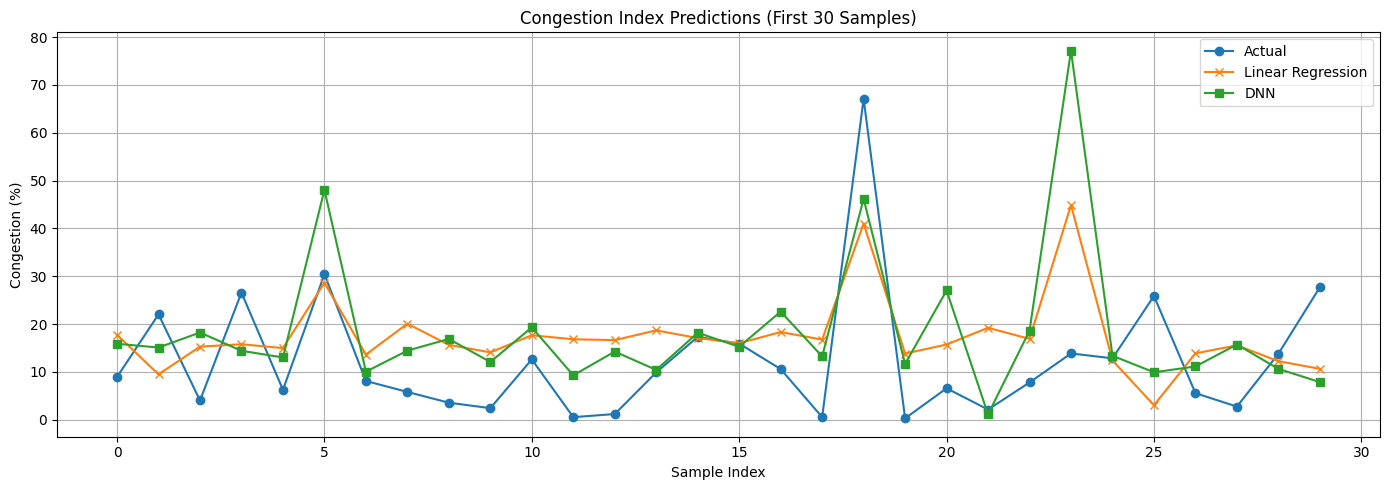

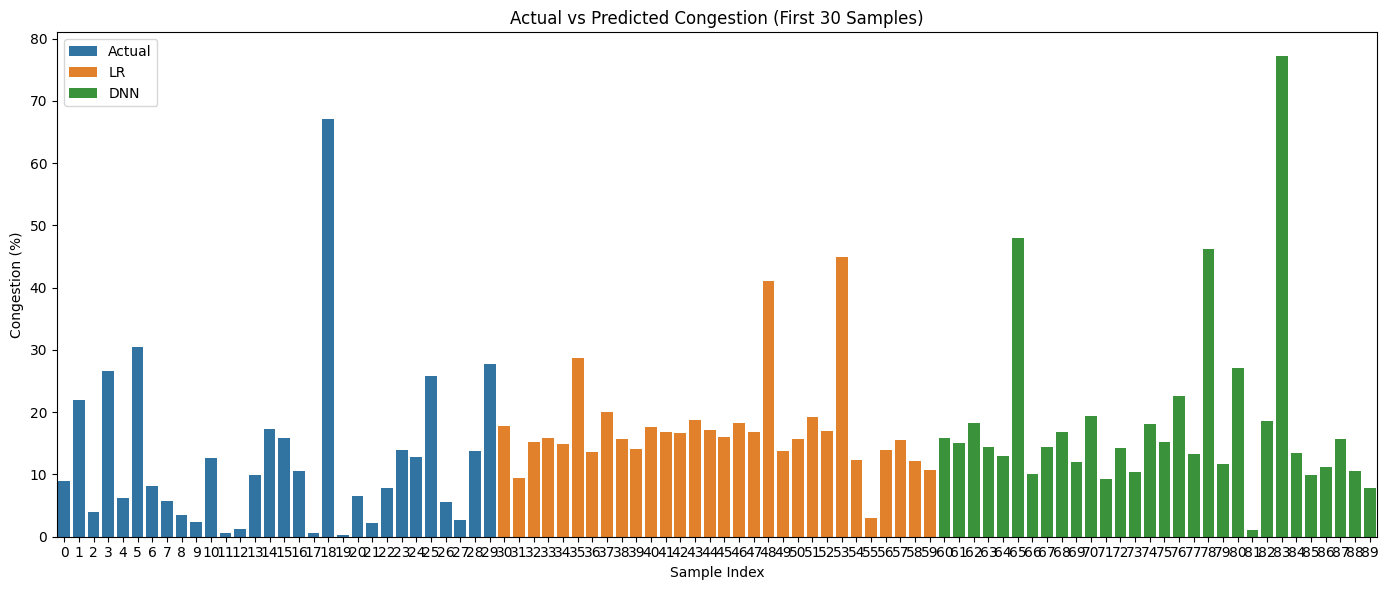

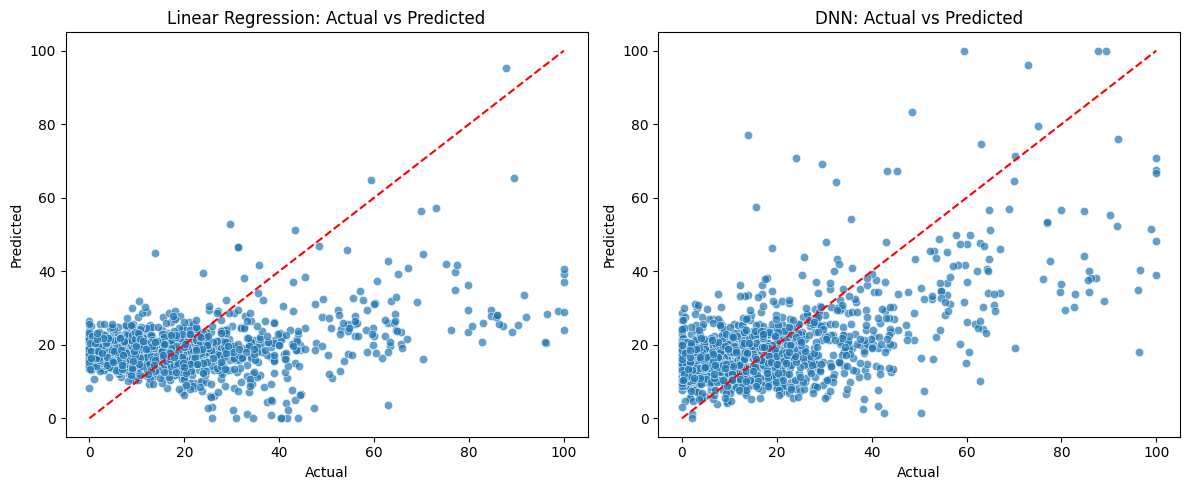

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/FinalDataset_with_LR_and_DNN.csv")

# Convert percentage strings to float
df["Actual"] = df["final_congestion_index"]
df["LR"] = df["Predicted_Congestion_LR(%)"].str.replace('%', '').astype(float)
df["DNN"] = df["Predicted_Congestion_DNN(%)"].str.replace('%', '').astype(float)

# Use a smaller sample for cleaner visuals (e.g., first 30 rows)
df_sample = df.head(30)

# --- Line Plot: Trend Comparison ---
plt.figure(figsize=(14, 5))
plt.plot(df_sample["Actual"], label="Actual", marker='o')
plt.plot(df_sample["LR"], label="Linear Regression", marker='x')
plt.plot(df_sample["DNN"], label="DNN", marker='s')
plt.title("Congestion Index Predictions (First 30 Samples)")
plt.ylabel("Congestion (%)")
plt.xlabel("Sample Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Bar Chart: Actual vs Predicted (Side-by-Side) ---
df_melted = df_sample[["Actual", "LR", "DNN"]].melt(var_name="Model", value_name="Congestion")
plt.figure(figsize=(14, 6))
sns.barplot(x=df_melted.index, y="Congestion", hue="Model", data=df_melted)
plt.title("Actual vs Predicted Congestion (First 30 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Congestion (%)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Scatter Plot: Accuracy Alignment ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df["Actual"], y=df["LR"], alpha=0.7)
plt.plot([0, 100], [0, 100], 'r--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df["Actual"], y=df["DNN"], alpha=0.7)
plt.plot([0, 100], [0, 100], 'r--')
plt.title("DNN: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()



📊 Evaluation Metrics for Linear Regression:
   R² Score: 0.1438
   MAE     : 12.7298
   MSE     : 288.3550
   RMSE    : 16.9810

📊 Evaluation Metrics for Deep Neural Network:
   R² Score: 0.3769
   MAE     : 10.8773
   MSE     : 209.8414
   RMSE    : 14.4859


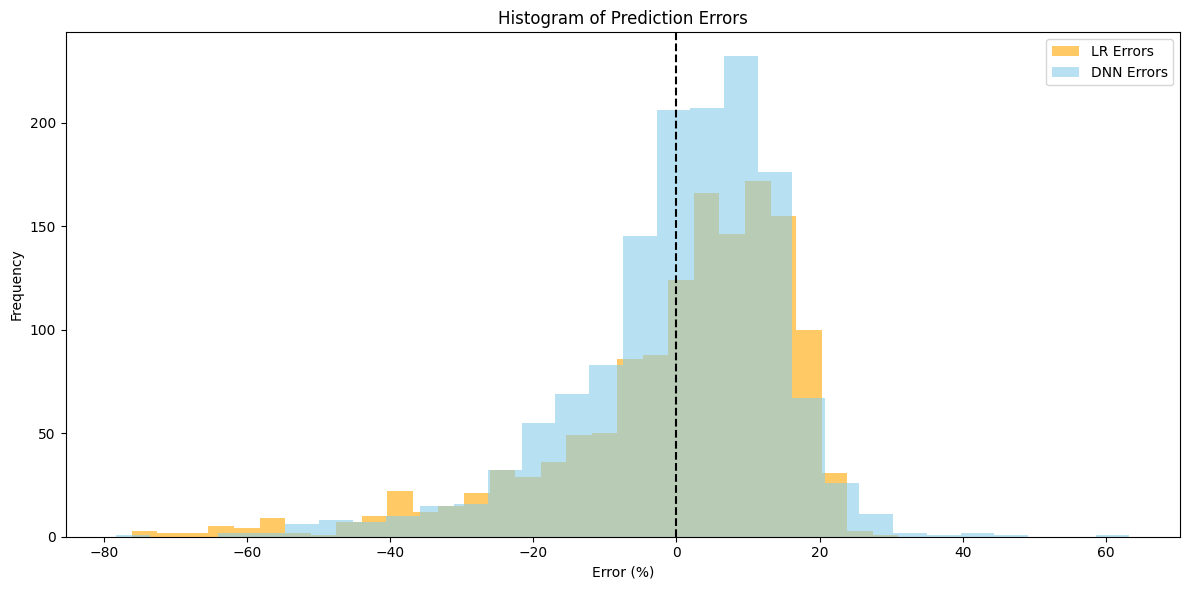

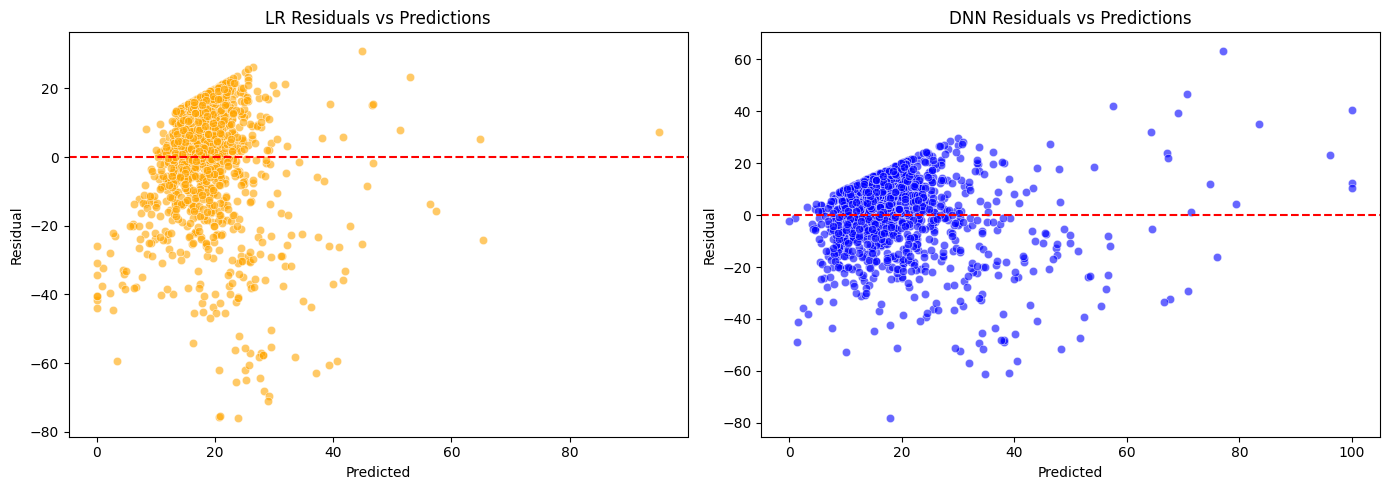

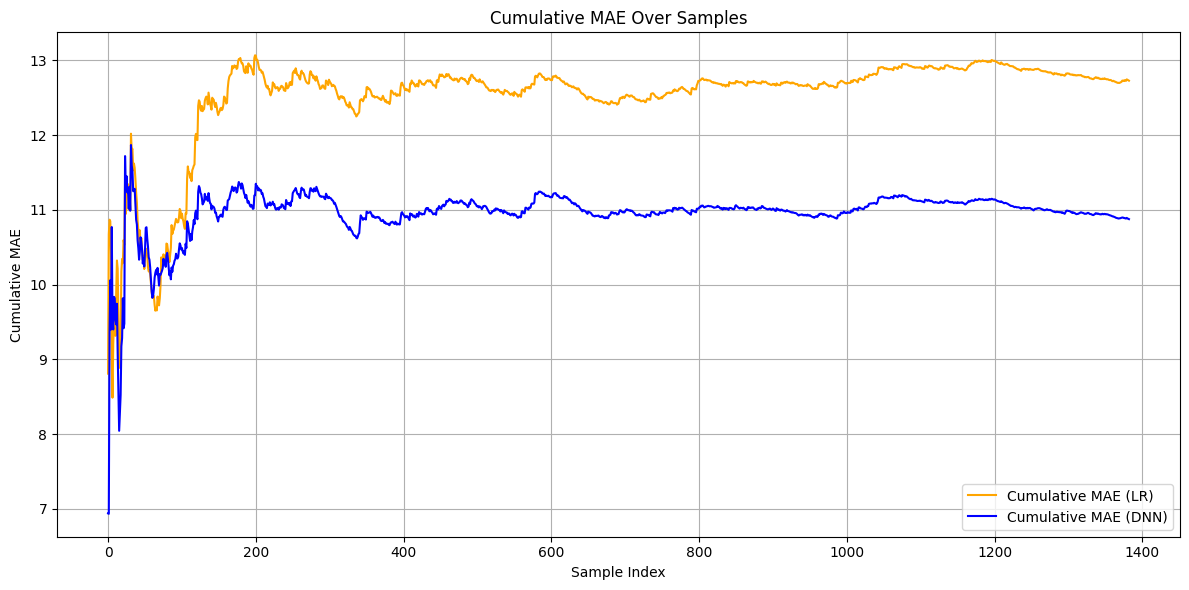

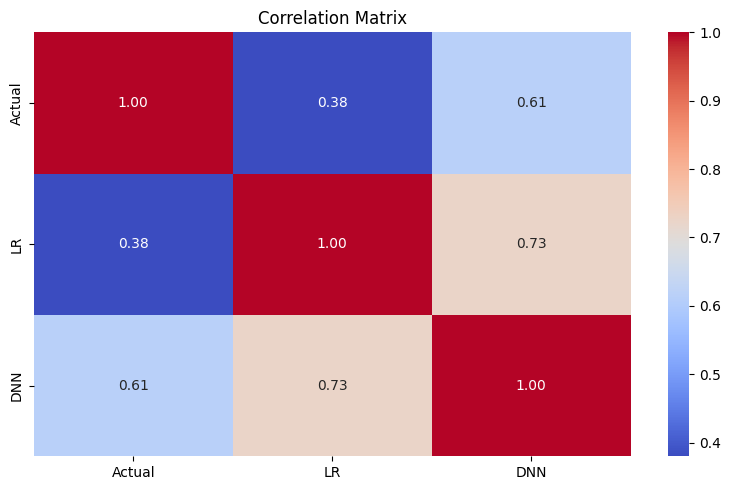

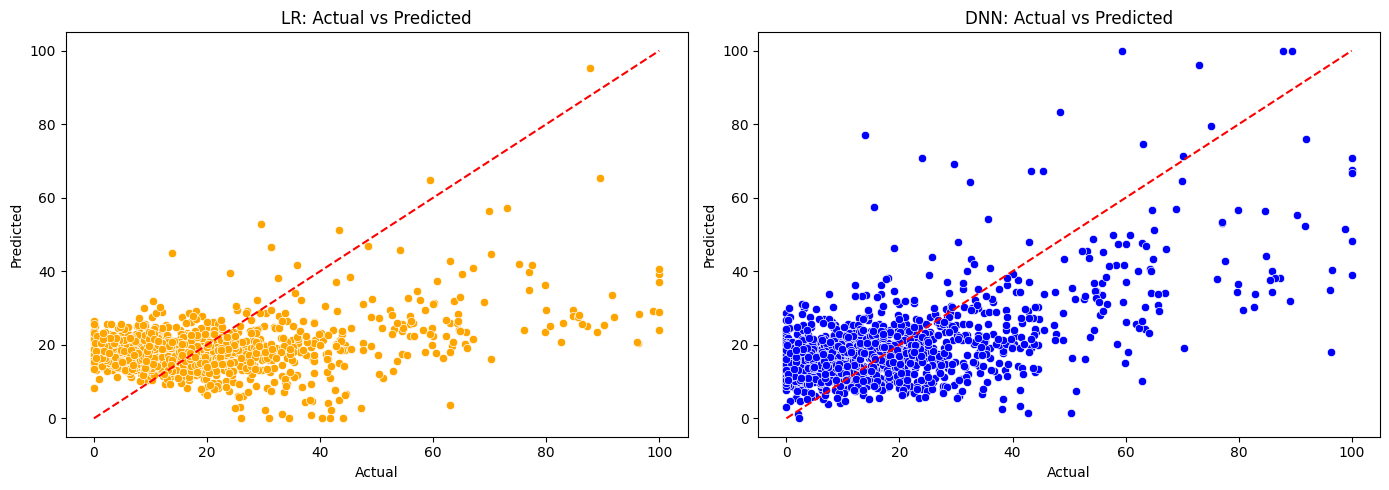

<ipython-input-5-ab3461185bf5>:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Absolute Error", data=error_data, palette=["orange", "blue"])


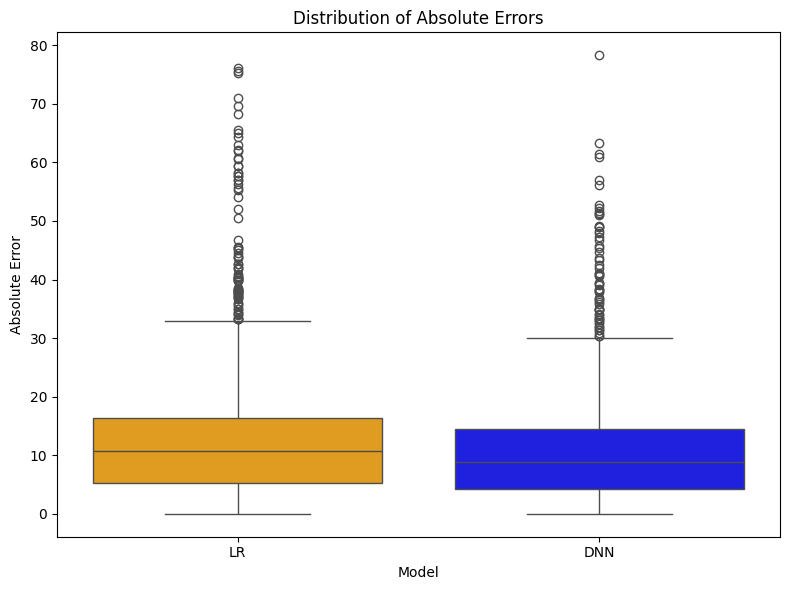

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("/content/FinalDataset_with_LR_and_DNN.csv")

# Clean and prepare columns
df["Actual"] = df["final_congestion_index"]
df["LR"] = df["Predicted_Congestion_LR(%)"].str.replace('%', '').astype(float)
df["DNN"] = df["Predicted_Congestion_DNN(%)"].str.replace('%', '').astype(float)

# -----------------------
# 1. Evaluation Metrics
# -----------------------

def print_metrics(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5

    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 Evaluation Metrics for {label}:")
    print(f"   R² Score: {r2:.4f}")
    print(f"   MAE     : {mae:.4f}")
    print(f"   MSE     : {mse:.4f}")
    print(f"   RMSE    : {rmse:.4f}")

print_metrics(df["Actual"], df["LR"], "Linear Regression")
print_metrics(df["Actual"], df["DNN"], "Deep Neural Network")

# -----------------------
# 2. Error Columns
# -----------------------
df["error_LR"] = df["LR"] - df["Actual"]
df["error_DNN"] = df["DNN"] - df["Actual"]
df["abs_error_LR"] = df["error_LR"].abs()
df["abs_error_DNN"] = df["error_DNN"].abs()

# -----------------------
# 3. Histograms of Error
# -----------------------
plt.figure(figsize=(12,6))
plt.hist(df["error_LR"], bins=30, alpha=0.6, label="LR Errors", color="orange")
plt.hist(df["error_DNN"], bins=30, alpha=0.6, label="DNN Errors", color="skyblue")
plt.axvline(0, color='black', linestyle='--')
plt.title("Histogram of Prediction Errors")
plt.xlabel("Error (%)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------
# 4. Residuals vs Prediction
# -----------------------
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df["LR"], y=df["error_LR"], alpha=0.6, color="orange")
plt.axhline(0, color='red', linestyle='--')
plt.title("LR Residuals vs Predictions")
plt.xlabel("Predicted")
plt.ylabel("Residual")

plt.subplot(1,2,2)
sns.scatterplot(x=df["DNN"], y=df["error_DNN"], alpha=0.6, color="blue")
plt.axhline(0, color='red', linestyle='--')
plt.title("DNN Residuals vs Predictions")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()

# -----------------------
# 5. Cumulative MAE
# -----------------------
df["cum_mae_LR"] = df["abs_error_LR"].expanding().mean()
df["cum_mae_DNN"] = df["abs_error_DNN"].expanding().mean()

plt.figure(figsize=(12,6))
plt.plot(df["cum_mae_LR"], label="Cumulative MAE (LR)", color="orange")
plt.plot(df["cum_mae_DNN"], label="Cumulative MAE (DNN)", color="blue")
plt.title("Cumulative MAE Over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Cumulative MAE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------
# 6. Correlation Matrix
# -----------------------
plt.figure(figsize=(8,5))
corr = df[["Actual", "LR", "DNN"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# -----------------------
# 7. Scatter Plots: Actual vs Predicted
# -----------------------
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df["Actual"], y=df["LR"], color="orange")
plt.plot([0, 100], [0, 100], 'r--')
plt.title("LR: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,2,2)
sns.scatterplot(x=df["Actual"], y=df["DNN"], color="blue")
plt.plot([0, 100], [0, 100], 'r--')
plt.title("DNN: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

# -----------------------
# 8. Boxplots of Absolute Errors
# -----------------------
plt.figure(figsize=(8,6))
error_data = pd.DataFrame({
    "Model": ["LR"] * len(df) + ["DNN"] * len(df),
    "Absolute Error": pd.concat([df["abs_error_LR"], df["abs_error_DNN"]])
})
sns.boxplot(x="Model", y="Absolute Error", data=error_data, palette=["orange", "blue"])
plt.title("Distribution of Absolute Errors")
plt.tight_layout()
plt.show()


📊 Basic Descriptive Stats:
          mean        std  min     max   range
LR   18.562972   6.534958  0.0   95.18   95.18
DNN  19.035770  11.075508  0.0  100.00  100.00


<ipython-input-9-7af083d3a74a>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["LR"], label="Linear Regression", shade=True)
<ipython-input-9-7af083d3a74a>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["DNN"], label="DNN", shade=True)


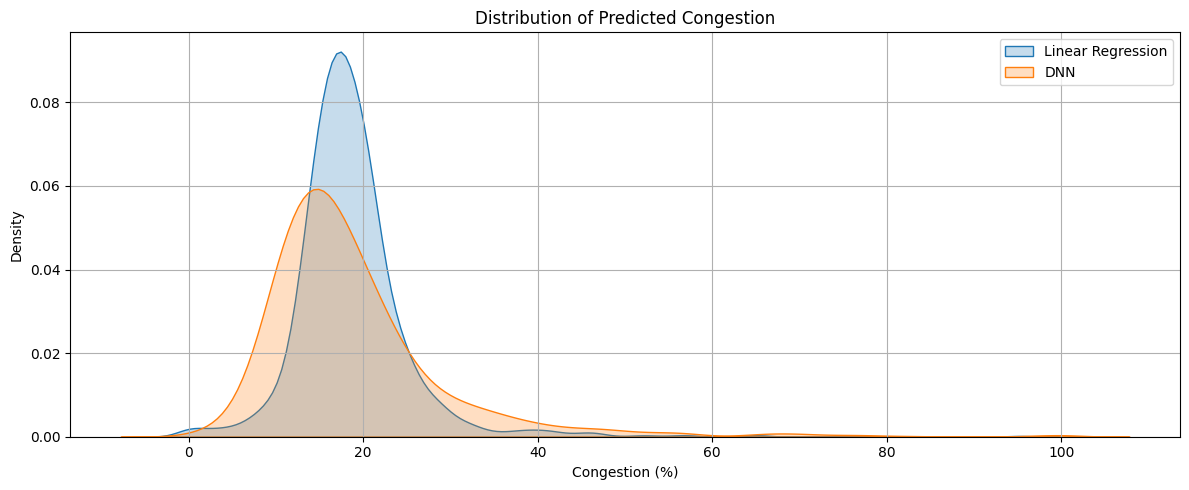

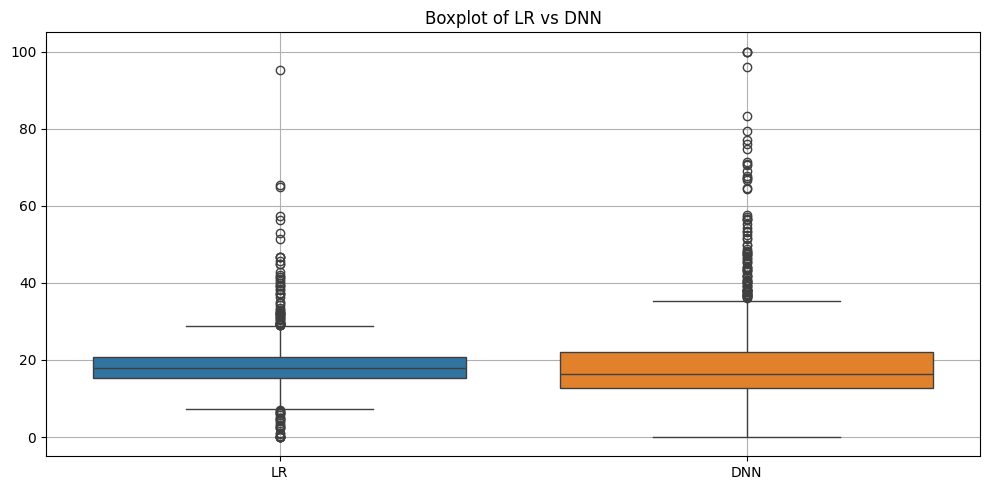

🔗 Correlation Coefficient between LR and DNN: 0.7255

📏 Average Absolute Difference: 5.46%
📈 Max Difference Found: 48.38%

🚨 Top 5 Samples with Largest Differences:
    Predicted_Congestion_LR(%) Predicted_Congestion_DNN(%)    Gap
383                     27.58%                      75.96%  48.38
339                     57.33%                      96.07%  38.74
537                     41.95%                      79.40%  37.45
678                     46.79%                      83.41%  36.62
849                     64.78%                     100.00%  35.22

✅ Agreement: 61.17% of samples have ≤ 5% difference between LR and DNN


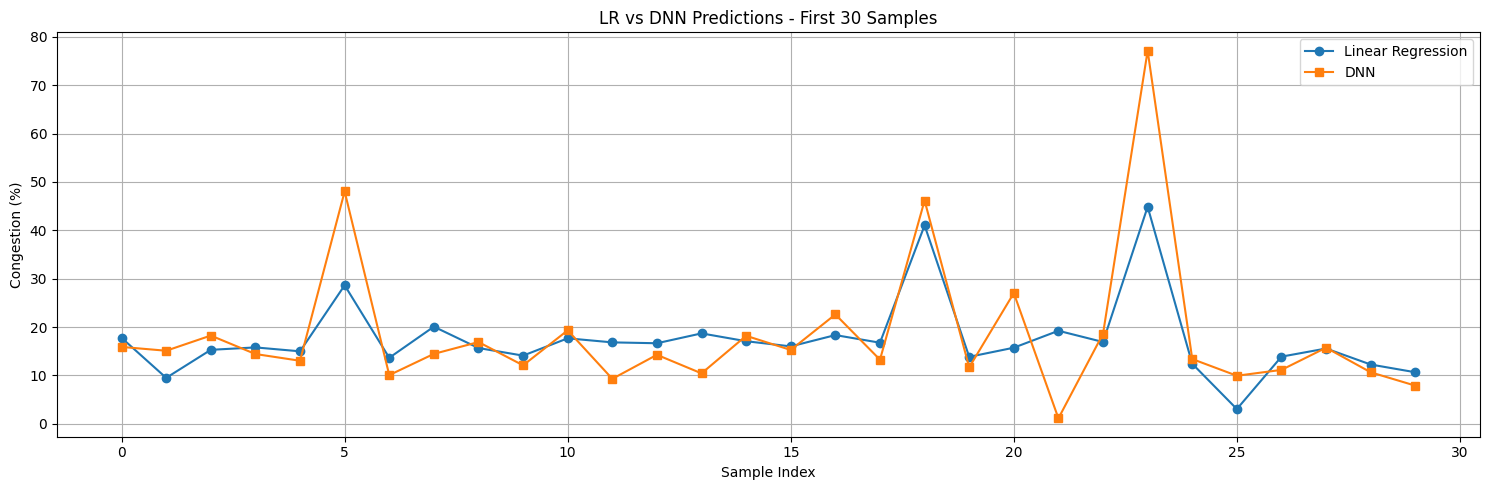

KeyError: "['final_congestion_index'] not found in axis"

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/FinalDataset_with_LR_and_DNN.csv")

# Drop the 'final_congestion_index' import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("/content/CleanedDataset_LR_DNN.csv")

# Clean percentage strings
df["LR"] = df["Predicted_Congestion_LR(%)"].str.replace('%', '').astype(float)
df["DNN"] = df["Predicted_Congestion_DNN(%)"].str.replace('%', '').astype(float)

# --- 1. Basic Statistical Comparison ---
print("📊 Basic Descriptive Stats:")
stats_df = df[["LR", "DNN"]].describe().T
stats_df["range"] = stats_df["max"] - stats_df["min"]
print(stats_df[["mean", "std", "min", "max", "range"]])

# --- 2. Distribution Comparison ---
plt.figure(figsize=(12, 5))
sns.kdeplot(df["LR"], label="Linear Regression", shade=True)
sns.kdeplot(df["DNN"], label="DNN", shade=True)
plt.title("Distribution of Predicted Congestion")
plt.xlabel("Congestion (%)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# --- 3. Boxplot Comparison ---
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["LR", "DNN"]])
plt.title("Boxplot of LR vs DNN")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 4. Correlation Between Predictions ---
correlation = df["LR"].corr(df["DNN"])
print(f"🔗 Correlation Coefficient between LR and DNN: {correlation:.4f}")

# --- 5. Gap Analysis ---
df["Gap"] = abs(df["LR"] - df["DNN"])
print(f"\n📏 Average Absolute Difference: {df['Gap'].mean():.2f}%")
print(f"📈 Max Difference Found: {df['Gap'].max():.2f}%")

# Show biggest gaps
print("\n🚨 Top 5 Samples with Largest Differences:")
print(df[["Predicted_Congestion_LR(%)", "Predicted_Congestion_DNN(%)", "Gap"]].sort_values(by="Gap", ascending=False).head(5))

# --- 6. Agreement Check: Gap ≤ threshold ---
threshold = 5  # % within which they agree
agree_pct = (df["Gap"] <= threshold).mean() * 100
print(f"\n✅ Agreement: {agree_pct:.2f}% of samples have ≤ {threshold}% difference between LR and DNN")

# --- 7. Trend Line Comparison (Optional for first 30 samples) ---
import matplotlib.pyplot as plt

# Plotting LR and DNN predictions for the first 30 samples
plt.figure(figsize=(15, 5))
plt.plot(df["LR"].head(30), label="Linear Regression", marker='o')
plt.plot(df["DNN"].head(30), label="DNN", marker='s')
plt.title("LR vs DNN Predictions - First 30 Samples")
plt.xlabel("Sample Index")
plt.ylabel("Congestion (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Dropping the 'final_congestion_index' column from the dataframe
df_cleaned = df.drop(columns=["final_congestion_index"])

# Save the cleaned dataset to CSV
df_cleaned.to_csv("CleanedDataset_LR_DNN.csv", index=False)

print("✅ 'final_congestion_index' column removed and cleaned file saved as 'CleanedDataset_LR_DNN.csv'")


In [ ]:
!ls

FinalDataset_with_LR_and_DNN.csv  sample_data


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric_temporal.nn import TGCN2
import pytorch_lightning as pl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import haversine_distances
from torch_geometric.loader import DataLoader

# Load and preprocess data
try:
    df = pd.read_csv('/content/FinalDataset_with_LR_and_DNN.csv')
except FileNotFoundError:
    print("Error: The file '/content/FinalDataset_with_LR_and_DNN.csv' was not found.")
    exit()

features = ['Latitude', 'Longitude', 'NTL_2023', 'NTL_2024', 'Road Width',
            'temperature_2m_2023', 'temperature_2m_2024', 'wind_speed_10m_2023',
            'wind_speed_10m_2024', 'Predicted_Congestion_LR(%)']

target = 'Predicted_Congestion_DNN(%)'

# Handle missing target column
if target not in df.columns:
    print(f"Error: The target column '{target}' was not found in the DataFrame.")
    exit()

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df[target].values

# Create graph structure based on geographical proximity
coords = df[['Latitude', 'Longitude']].values
rad_coords = np.radians(coords)
distance_matrix = haversine_distances(rad_coords) * 6371000/1000  # Convert to km

# Create adjacency matrix (threshold=50km)
adj_threshold = 50
edge_index = []
for i in range(len(coords)):
    for j in range(len(coords)):
        if i != j and distance_matrix[i,j] < adj_threshold:
            edge_index.append([i,j])

edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# Create PyTorch Geometric dataset
data = Data(
    x=torch.tensor(X, dtype=torch.float),
    y=torch.tensor(y, dtype=torch.float).view(-1,1),
    edge_index=edge_index
)

# Split data
train_idx, test_idx = train_test_split(range(len(df)), test_size=0.2, random_state=42)
train_mask = torch.tensor(train_idx, dtype=torch.long)
test_mask = torch.tensor(test_idx, dtype=torch.long)

# Define Spatio-Temporal Model
class STGNNModel(pl.LightningModule):
    def __init__(self, node_features, hidden_channels):
        super().__init__()
        self.tgnn = TGCN2(node_features, hidden_channels)
        self.linear = torch.nn.Linear(hidden_channels, 1)

    def forward(self, x, edge_index):
        h = self.tgnn(x, edge_index)
        return self.linear(h)

    def training_step(self, batch, batch_idx):
        x, y, edge_index = batch.x, batch.y, batch.edge_index
        y_pred = self(x, edge_index)
        loss = torch.nn.functional.mse_loss(y_pred, y)
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.01)

# Initialize model
model = STGNNModel(node_features=len(features), hidden_channels=32)

# Create data loaders
train_data = Data(x=data.x[train_mask], y=data.y[train_mask], edge_index=data.edge_index[:, data.edge_index[0].isin(train_mask) & data.edge_index[1].isin(train_mask)])
test_data = Data(x=data.x[test_mask], y=data.y[test_mask], edge_index=data.edge_index[:, data.edge_index[0].isin(test_mask) & data.edge_index[1].isin(test_mask)])

train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

# Train model
trainer = pl.Trainer(max_epochs=50, progress_bar_refresh_rate=20)
trainer.fit(model, train_loader)

# Evaluate
with torch.no_grad():
    model.eval()
    predictions = []
    actuals = []
    for batch in test_loader:
        out = model(batch.x, batch.edge_index)
        predictions.extend(out.cpu().numpy())
        actuals.extend(batch.y.cpu().numpy())

    predictions = torch.tensor(predictions)
    actuals = torch.tensor(actuals)
    test_loss = torch.nn.functional.mse_loss(predictions, actuals)
print(f'Test MSE: {test_loss.item():.4f}')


ModuleNotFoundError: No module named 'torch_geometric'

In [ ]:
import torch
print(torch.__version__)
print(torch.version.cuda) # Will output 'None' if you don't have CUDA enabled

2.6.0+cu124
12.4


In [ ]:
!pip install torch_geometric torch-scatter torch-sparse torch-cluster -f https://data.pyg.org/whl/torch-2.6.0+cu124.html
!pip install pytorch-lightning torch-geometric-temporal

Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 50.0 MB/s eta 0:00:00
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)
  Using cached pytorch_lightning-2.5.1.post0-py3-none-any.whl.metadata (20 kB)
  Using cached torch_geometric_temporal-0.56.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached torchmetrics-1.7.1-py3-none-any.whl.metadata (21 kB)
  Using cached lightning_utilities-0.14.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-m

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric_temporal.nn import TGCN2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import haversine_distances
import pytorch_lightning as pl

# Load and clean data
file_path = "/content/FinalDataset_with_LR_and_DNN.csv"
df = pd.read_csv(file_path)
df['Predicted_Congestion_LR(%)'] = df['Predicted_Congestion_LR(%)'].str.rstrip('%').astype(float)
df['Predicted_Congestion_DNN(%)'] = df['Predicted_Congestion_DNN(%)'].str.rstrip('%').astype(float)

# Feature and target selection
features = ['Latitude', 'Longitude', 'NTL_2023', 'NTL_2024', 'Road Width',
            'temperature_2m_2023', 'temperature_2m_2024', 'wind_speed_10m_2023',
            'wind_speed_10m_2024', 'Predicted_Congestion_LR(%)']
target = 'Predicted_Congestion_DNN(%)'


In [ ]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df[target].values.reshape(-1, 1)

# Graph edges based on Haversine distance (threshold = 50 km)
coords = np.radians(df[['Latitude', 'Longitude']].values)
dist_matrix = haversine_distances(coords) * 6371  # km
edge_index = torch.tensor(np.array([[i, j] for i in range(len(df))
                                     for j in range(len(df))
                                     if i != j and dist_matrix[i, j] < 50]), dtype=torch.long).t().contiguous()

# Create full data object
data = Data(x=torch.tensor(X, dtype=torch.float),
            y=torch.tensor(y, dtype=torch.float),
            edge_index=edge_index)

# Split dataset
train_idx, test_idx = train_test_split(np.arange(len(df)), test_size=0.2, random_state=42)
train_mask = torch.zeros(len(df), dtype=torch.bool)
test_mask = torch.zeros(len(df), dtype=torch.bool)
train_mask[train_idx] = True
test_mask[test_idx] = True
data.train_mask = train_mask
data.test_mask = test_mask


In [ ]:


# Model definition
class STGNNModel(pl.LightningModule):
    def __init__(self, in_channels, hidden_channels):
        super().__init__()
        self.tgnn = TGCN2(in_channels, hidden_channels, batch_size=1)
        self.linear = torch.nn.Linear(hidden_channels, 1)

    def forward(self, x, edge_index):
        h = self.tgnn(x, edge_index)
        return self.linear(h)

    def training_step(self, batch, batch_idx):
        out = self(batch.x, batch.edge_index)
        loss = torch.nn.functional.mse_loss(out[batch.train_mask], batch.y[batch.train_mask])
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        out = self(batch.x, batch.edge_index)
        loss = torch.nn.functional.mse_loss(out[batch.test_mask], batch.y[batch.test_mask])
        self.log("val_loss", loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.01)

# Initialize model
model = STGNNModel(in_channels=len(features), hidden_channels=32)

# Train using PyTorch Lightning
from torch_geometric.loader import DataLoader
train_loader = DataLoader([data], batch_size=1)

trainer = pl.Trainer(max_epochs=50, enable_progress_bar=True)
trainer.fit(model, train_loader)

# Evaluate
model.eval()
with torch.no_grad():
    preds = model(data.x, data.edge_index).squeeze()
    mse = torch.nn.functional.mse_loss(preds[test_mask], data.y[test_mask].squeeze())
    print(f"Test MSE: {mse.item():.4f}")


INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type   | Params | Mode 
------------------------------------------
0 | tgnn   | TGCN2  | 7.3 K  | train
1 | linear | Linear | 33     | train
------------------------------------------
7.3 K     Trainable params
0         Non-trainable params
7.3 K     Total params
0.029     Total estimated model params size (MB)
14    

Training: |          | 0/? [00:00<?, ?it/s]

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [ ]:
import os
import numpy as np
import pandas as pd

# Set your weather data folder path
weather_folder = "/content/weathercontent"

# Step 1: Get all file names (assuming pattern like weather_data_01.csv)
weather_files = sorted([
    f for f in os.listdir(weather_folder)
    if f.startswith("weather_data_") and f.endswith(".csv")
])
num_nodes = len(weather_files)

# Step 2: Load a sample to find time steps and features
sample_df = pd.read_csv(os.path.join(weather_folder, weather_files[0]))
time_steps, num_features = sample_df.shape

# Step 3: Initialize array
weather_array = np.zeros((time_steps, num_nodes, num_features), dtype=np.float32)

# Step 4: Populate array
for idx, file in enumerate(weather_files):
    file_path = os.path.join(weather_folder, file)
    df = pd.read_csv(file_path)
    if df.shape != (time_steps, num_features):
        print(f"Skipping {file} due to shape mismatch: {df.shape}")
        continue
    weather_array[:, idx, :] = df.values

# Step 5: Save result
np.save("spatio_temporal_weather.npy", weather_array)
print("Saved spatio_temporal_weather.npy with shape:", weather_array.shape)


ValueError: could not convert string to float: '2023-05-31 18:30:00+00:00'

In [ ]:
import os
import numpy as np
import pandas as pd

# Set your weather data folder path
weather_folder = "/content/weathercontent"

# Step 1: Get all file names
weather_files = sorted([
    f for f in os.listdir(weather_folder)
    if f.startswith("weather_data_") and f.endswith(".csv")
])
num_nodes = len(weather_files)

# Step 2: Load a sample and drop datetime column
sample_df = pd.read_csv(os.path.join(weather_folder, weather_files[0]))
# Automatically drop non-numeric columns (e.g., datetime)
sample_df_numeric = sample_df.select_dtypes(include=[np.number])
time_steps, num_features = sample_df_numeric.shape

# Step 3: Initialize array
weather_array = np.zeros((time_steps, num_nodes, num_features), dtype=np.float32)

# Step 4: Populate array
for idx, file in enumerate(weather_files):
    df = pd.read_csv(os.path.join(weather_folder, file))
    df_numeric = df.select_dtypes(include=[np.number])
    if df_numeric.shape != (time_steps, num_features):
        print(f"Skipping {file} due to shape mismatch: {df_numeric.shape}")
        continue
    weather_array[:, idx, :] = df_numeric.values

# Step 5: Save result
np.save("spatio_temporal_weather.npy", weather_array)
print("Saved spatio_temporal_weather.npy with shape:", weather_array.shape)


Saved spatio_temporal_weather.npy with shape: (8760, 10, 9)


In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler

# Load weather data: (time, nodes, weather_features)
weather = np.load("/content/spatio_temporal_weather.npy")  # shape: (T, N, W)

# Load static features: Road width & NTL (nodes x 2)
static_df = pd.read_csv("/content/RoadwidthAndNTL.csv")
static_features = static_df[['NTL', 'Roadwidth']].values  # shape: (N, 2)

# Repeat static features across time axis and concatenate
T, N, W = weather.shape
static_repeated = np.tile(static_features[None, :, :], (T, 1, 1))  # shape: (T, N, 2)
X = np.concatenate([weather, static_repeated], axis=-1)  # shape: (T, N, W+2)

# Normalize features
scaler = StandardScaler()
X_reshaped = X.reshape(-1, W+2)
X_scaled = scaler.fit_transform(X_reshaped).reshape(T, N, W+2)

# Convert to torch tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)  # shape: (T, N, F)


KeyError: "None of [Index(['NTL', 'Roadwidth'], dtype='object')] are in the [columns]"

In [ ]:
import numpy as np

# Load .npy file
weather_data = np.load('/content/combined_spatio_temporal_data.npy', allow_pickle=True)

# Check the type and preview data
print(type(weather_data))
print(weather_data)


<class 'numpy.ndarray'>
[[[5.45096000e+05 2.31415024e+01 7.74854965e+01 ... 7.07287788e+00
   1.66825757e+01 4.01800000e+01]
  [2.44000000e+05 2.48224678e+01 8.79669647e+01 ... 1.12984953e+01
   1.15232201e+01 4.44900000e+01]
  [3.30113000e+05 2.95198917e+01 7.43359604e+01 ... 9.44957161e+00
   2.68708336e+00 4.48400000e+01]
  ...
  [3.92022000e+05 2.27998447e+01 8.61444702e+01 ... 9.88526154e+00
   2.04655685e+01 5.28300000e+01]
  [3.52028000e+05 1.76854343e+01 8.31499329e+01 ... 6.11999989e+00
   6.98753786e+00 5.04900000e+01]
  [5.20006000e+05 2.73035774e+01 7.80033264e+01 ... 7.95265961e+00
   1.53096590e+01 3.04900000e+01]]

 [[5.45096000e+05 2.31415024e+01 7.74854965e+01 ... 9.58573914e+00
   1.66825757e+01 4.01800000e+01]
  [2.44000000e+05 2.48224678e+01 8.79669647e+01 ... 9.69329643e+00
   1.15232201e+01 4.44900000e+01]
  [3.30113000e+05 2.95198917e+01 7.43359604e+01 ... 1.68316841e+01
   2.68708336e+00 4.48400000e+01]
  ...
  [3.92022000e+05 2.27998447e+01 8.61444702e+01 ... 6

In [ ]:
import numpy as np
import pandas as pd

# Load spatio-temporal weather data (shape: 8760 x 10 x 9)
weather_data = np.load('spatio_temporal_weather.npy', allow_pickle=True)

# Load road width and NTL values
road_ntl_df = pd.read_csv('RoadwidthAndNTL.csv')
road_ntl_df.columns = road_ntl_df.columns.str.strip()  # Strip any extra spaces

# Take only first 10 entries to match the weather data nodes
road_ntl_df = road_ntl_df.iloc[:10]

# Compute average NTL
road_ntl_df["Avg_NTL"] = road_ntl_df[["NTL_2023", "NTL_2024"]].mean(axis=1)

# Extract [Avg_NTL, Road Width] as a (10, 2) matrix
augmented_features = road_ntl_df[["Avg_NTL", "Road Width"]].values

# Repeat along time axis to match (8760, 10, 2)
expanded_augmented = np.repeat(augmented_features[np.newaxis, :, :], weather_data.shape[0], axis=0)

# Concatenate along feature axis -> final shape: (8760, 10, 11)
combined_data = np.concatenate((weather_data, expanded_augmented), axis=-1)

# Save for use in STGNN
np.save("combined_spatio_temporal_data.npy", combined_data)


In [ ]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np

# Load file
geo_df = pd.read_csv('Toll_Plaza_Geo_co-ord.csv')

# Take first 10 only (to match nodes in spatio-temporal data)
geo_df = geo_df.iloc[:10]

# Extract coordinates
coords = geo_df[['Latitudes', 'Longitude']].values

num_nodes = len(coords)
adj_matrix = np.zeros((num_nodes, num_nodes))

for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j:
            adj_matrix[i, j] = geodesic(coords[i], coords[j]).kilometers

threshold_km = 100  # adjust as needed
adj_binary = (adj_matrix < threshold_km).astype(int)
np.fill_diagonal(adj_binary, 0)  # no self-loops

np.save("adjacency_matrix.npy", adj_binary)


In [ ]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np

# Load the geo-coordinates
geo_df = pd.read_csv("Toll_Plaza_Geo_co-ord.csv")

# Use only the first 10 rows (since weather data has 10 nodes)
geo_df = geo_df.iloc[1:11]

# Extract coordinates
coords = geo_df[['Latitudes', 'Longitude']].values

# Initialize distance matrix
num_nodes = len(coords)
dist_matrix = np.zeros((num_nodes, num_nodes))

# Compute geodesic distance between all pairs
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j:
            dist_matrix[i, j] = geodesic(coords[i], coords[j]).kilometers
        else:
            dist_matrix[i, j] = 0.0  # No self-loop


In [ ]:
# Set distance threshold for connection (e.g., 100 km)
threshold_km = 100

# Binary adjacency: 1 if nodes are within threshold, else 0
adj_matrix = (dist_matrix < threshold_km).astype(int)

# Remove self-loops explicitly
np.fill_diagonal(adj_matrix, 0)

# Save the adjacency matrix
np.save("adjacency_matrix.npy", adj_matrix)
